## 3.1 Churn prediction project
- Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## 3.2 Data preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn varialbles needs any preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [8]:
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [10]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework
- Perform train/validation/test split with Scikit-Learn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train , df_test = train_test_split(df,test_size=0.2,random_state=1)

In [13]:
len(df_full_train) , len(df_test)

(5634, 1409)

In [14]:
df_train , df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [15]:
len(df_train) , len(df_val) , len(df_test)

(4225, 1409, 1409)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA

In [19]:
df_full_train=df_full_train.reset_index(drop=True)

In [20]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [21]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [22]:
numerical = ['tenure','monthlycharges','totalcharges']

In [23]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [24]:
categorical =['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [25]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information - later

### Chrun rate

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [27]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [28]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [29]:
global_churn = np.round(df_full_train.churn.mean(),2)
global_churn

0.27

In [30]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [31]:
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_with_partner

0.20503330866025166

In [32]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [33]:
global_churn - churn_female

-0.006824034334763918

### Risk ratio

In [34]:
churn_no_partner / global_churn

1.22151482997322

In [35]:
churn_with_partner / global_churn

0.7593826246675986

In [36]:
from Ipython.display import diplay

ModuleNotFoundError: No module named 'Ipython'

In [37]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


## 3.6 Feature importance: Mutual Importance
Mutual imformation- concept from information theory, it tells us how much we can learn about one variable if we know the value of another
https://en.wikipedia.org/wiki/Mutual_information

In [38]:
from sklearn.metrics import mutual_info_score

In [39]:
mutual_info_score(df_full_train.churn,df_full_train.contract)

0.0983203874041556

In [40]:
mutual_info_score(df_full_train.churn,df_full_train.gender)

0.0001174846211139946

In [41]:
mutual_info_score(df_full_train.churn,df_full_train.partner)

0.009967689095399745

In [42]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [43]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation
How about numerical columns?
- Correlation coefficient: https://en.wikipedia.org/wiki/Correlation_coefficient#:~:text=From%20Wikipedia%2C%20the%20free%20encyclopedia%20A%20correlation%20coefficient,a%20multivariate%20random%20variable%20with%20a%20known%20distribution.

In [44]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [45]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [46]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

In [47]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [48]:
df_full_train[df_full_train.monthlycharges<=20].churn.mean()

0.08795411089866156

In [49]:
df_full_train[(df_full_train.monthlycharges>20)&(df_full_train.monthlycharges<=50)].churn.mean()

0.18340943683409436

In [50]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One hot encoding
- Use scikit-learn to encode categorical features

In [51]:
from sklearn.feature_extraction import DictVectorizer

In [52]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [53]:
dv = DictVectorizer(sparse=False)

In [54]:
X_train = dv.fit_transform(train_dicts)

In [55]:
X_train.shape

(4225, 45)

In [56]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [57]:
X_val = dv.transform(val_dicts)

## 3.9 Logistic Regression
- Binary Classsifiction
- Linear vs logistic regression

In [58]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [59]:
z = np.linspace(-7,7,51)

In [60]:
sigmoid(-10000)

C:\conda_temp\ipykernel_2188\3813440747.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+ np.exp(-z))


0.0

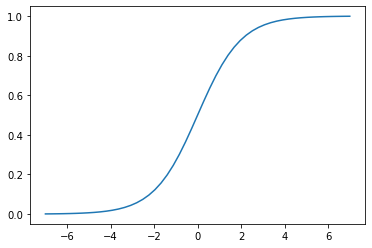

In [61]:
plt.plot(z,sigmoid(z))

In [62]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score +xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-learn
- Train a model with Schikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [65]:
model.intercept_[0]

-0.10904523574622123

In [66]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [67]:
y_pred = model.predict_proba(X_val)[:,1]

In [68]:
churn_decision = (y_pred >=  0.5)

In [69]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [70]:
(y_val == churn_decision).mean()

0.8034066713981547

In [71]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [72]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [73]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [74]:
a=[1,2,3,4,5]
b='abcd'

In [75]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [76]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [77]:
small = ['contract','tenure','monthlycharges']

In [78]:
df_train[small].iloc[:10].to_dict(orient='record')

C:\conda_temp\ipykernel_2188\1207382693.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  df_train[small].iloc[:10].to_dict(orient='record')


[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [79]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [80]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [81]:
dv_small.get_feature_names()

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [82]:
X_train_small = dv_small.transform(dicts_train_small)

In [83]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [84]:
w0 = model_small.intercept_[0]
w0

-2.4767756593105

In [85]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [86]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [87]:
-2.47 + (-0.949) + 30 * 0.027 + 24*(-0.036)

-3.473

In [88]:
sigmoid(_)

0.030090303318277657

## 3.12 Using the model

In [89]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [90]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [91]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [92]:
y_full_train = df_full_train.churn.values

In [93]:
model = LogisticRegression().fit(X_full_train , y_full_train)

In [94]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

LogisticRegression()

In [95]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [96]:
X_test = dv.fit_transform(dicts_test)

In [97]:
y_pred = model.predict_proba(X_test)[:,1]

In [98]:
churn_decision = (y_pred >= 0.5)

In [99]:
(churn_decision == y_test).mean()

0.815471965933286

In [100]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [101]:
X_small = dv.transform([customer])

In [102]:
model.predict_proba(X_small)[0,1]

0.5968852088278249

In [103]:
y_test[-1]

1

## 4. Evaluation Metrics for Classification

### 4.1 Evaluation metrics: session overview

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [106]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
    
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [107]:
df_full_train , df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train , df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [108]:
numerical = ['tenure','monthlycharges','totalcharges']

categorical= ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [109]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >=0.5)
(y_val == churn_decision).mean()

0.7998580553584103

## 4.2 Accuracy and dummy model
- Evaluate the model on different thredholds
- Check the accuracy of dummy baselines

In [111]:
len(y_val)

1409

In [112]:
(y_val == churn_decision).mean()

0.7998580553584103

In [113]:
1127/1409

0.7998580553584103

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_val,y_pred>=0.5)

0.7998580553584103

In [116]:
thresholds = np.linspace(0,1,21)
scores =[]

for t in thresholds:
    score = accuracy_score(y_val,y_pred>=t)
    print('%.2f %.3f'%(t,score))
    scores.append(score)

0.00 0.269
0.05 0.527
0.10 0.622
0.15 0.674
0.20 0.705
0.25 0.748
0.30 0.761
0.35 0.776
0.40 0.786
0.45 0.791
0.50 0.800
0.55 0.795
0.60 0.789
0.65 0.781
0.70 0.761
0.75 0.746
0.80 0.733
0.85 0.731
0.90 0.731
0.95 0.731
1.00 0.731


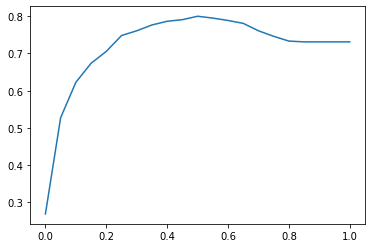

In [117]:
plt.plot(thresholds,scores)

In [118]:
from collections import Counter

In [119]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [120]:
Counter(y_val)

Counter({0: 1030, 1: 379})

In [121]:
1- y_val.mean()

0.7310149041873669

## 4.3 Confusion table
- Different types of errors and correct decisions
- Arranging them in a table

In [122]:
actual_positive = (y_val==1)
actual_negativve = (y_val==0)

In [123]:
t=0.5
predict_positive = (y_pred>=t)
predict_negative = (y_pred<t)

In [124]:
predict_positive[:5]

array([False, False, False,  True, False])

In [125]:
actual_positive[:5]

array([False, False,  True,  True, False])

In [126]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negativve).sum()

In [127]:
fp = (predict_positive & actual_negativve).sum()
fn = (predict_negative & actual_positive).sum()

In [128]:
fp , fn

(102, 180)

In [129]:
tp,tn

(199, 928)

In [130]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
    ])
confusion_matrix

array([[928, 102],
       [180, 199]])

In [131]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.66, 0.07],
       [0.13, 0.14]])

## 4.4 Precision and recall

In [132]:
(tp + tn) / (tp + tn + fp + fn)

0.7998580553584103

In [133]:
p = tp / (tp+fp)
p

0.6611295681063123

In [134]:
tp + fp

301

In [135]:
r = tp / (tp + fn)
r

0.525065963060686

## 4.5 ROC Curves

### TPR and FPR

In [146]:
tpr = tp / (tp+fn)
tpr

0.0

In [147]:
r

0.525065963060686

In [148]:
fpr = fp / (fp+tn)
fpr

0.0

In [149]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val==1)
    actual_negativve = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negativve).sum()
    
    fp = (predict_positive & actual_negativve).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp , tp ,fn , tn))

In [150]:
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores,columns=columns)

In [151]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)

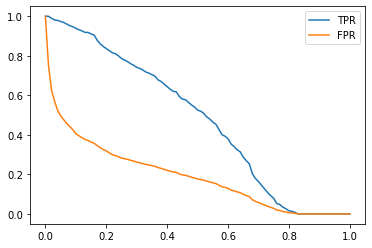

In [152]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [153]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [154]:


df_rand = tpr_fpr_dataframe(y_val, y_rand)



NameError: name 'y_rand' is not defined

In [155]:


plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()



NameError: name 'df_rand' is not defined

### Ideal model

In [156]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg , num_pos

(1030, 379)

In [157]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [158]:
y_ideal_pred= np.linspace(0,1,len(y_val))

In [159]:
((y_ideal_pred >=0.73) == y_ideal).mean()

0.9985805535841022

In [160]:
1 - y_val.mean()

0.7310149041873669

In [161]:
((y_ideal_pred >=0.731) == y_ideal).mean()

1.0

In [162]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)

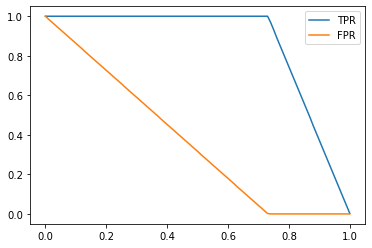

In [163]:
plt.plot(df_ideal.threshold,df_ideal['tpr'],label='TPR')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label='FPR')
plt.legend()

### Putting everything together

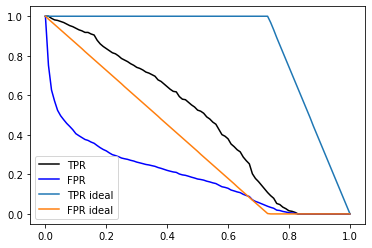

In [164]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

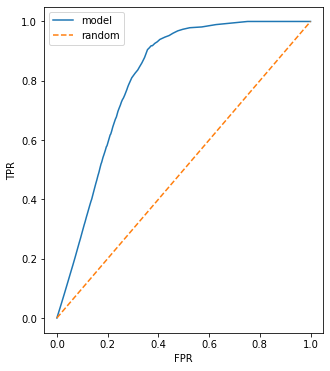

In [165]:
plt.figure(figsize=(5,6))

plt.plot(df_scores.fpr,df_scores.tpr,label='model')
plt.plot([0,1],[0,1],label='random',linestyle='--')
#plt.plot(df_ideal.fpr,df_ideal.tpr,label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [166]:
from sklearn.metrics import roc_curve

In [167]:
fpr,tpr,thresholds =  roc_curve(y_val,y_pred)

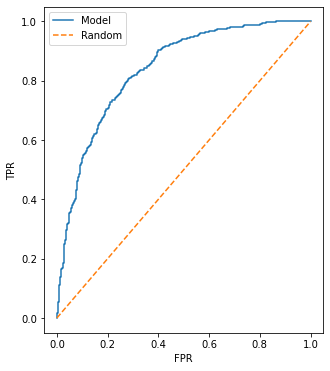

In [168]:
plt.figure(figsize=(5,6))

plt.plot(fpr,tpr, label='Model')
plt.plot([0,1],[0,1],label='Random',linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.6 ROC AUC
- Area under the ROC curve - useful metric
- Interpretation of AUC

In [169]:
from sklearn.metrics import auc

In [170]:
auc(df_scores.fpr , df_scores.tpr)

0.8105424049336588

In [171]:
auc(fpr,tpr)

0.8379972846274047

In [172]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999692599328842

In [173]:
fpr,tpr,thresholds = roc_curve(y_val,y_pred)
auc(df_scores.fpr , df_scores.tpr)

0.8105424049336588

In [174]:
from sklearn.metrics import roc_auc_score

In [175]:
roc_auc_score(y_val , y_pred)

0.8379972846274047

In [176]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [177]:
import random

In [178]:
n=100000
success=0
for i in range(n):
    pos_ind = random.randint(0,len(pos)-1)
    neg_ind = random.randint(0,len(neg)-1)
    
    if pos[pos_ind]>neg[neg_ind]:
        success = success + 1

success / n

0.83794

In [179]:
n=50000

np.random.seed(1)
pos_ind = np.random.randint(0,len(pos),size=n)
neg_ind = np.random.randint(0,len(neg),size=n)

In [180]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.8393

## 4.7 Cross-Validation
- Evaluating the same model on different subsets of data
- Getting  the average prediction and the spread within the prediction

In [225]:
 def train(df_train,y_train,C=1.0):
        dicts = df_train[categorical+numerical].to_dict(orient='records')
        
        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(dicts)
        
        model =LogisticRegression(C=C,max_iter=1000)
        model.fit(X_train,y_train)
        
        return dv, model

In [236]:
dv,model = train(df_train,y_train,C=0.001)

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [237]:
def predict(df,dv,model):
    dicts = df[categorical+numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [238]:
y_pred = predict(df_val,dv,model)

In [239]:
from sklearn.model_selection import KFold

In [240]:
kfold = KFold(n_splits=10,shuffle=True,random_state=1)

In [242]:
from tqdm.auto import tqdm

In [246]:
n_splits = 5

for C in [0,0.001,0.01,0.1,0.5,1,10]:
    
    
    scores =[]
    
    kfold = KFold(n_splits=n_splits,shuffle=True,random_state=1)

    for train_idx , val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv,model = train(df_train,y_train)
        y_pred = predict(df_val, dv,model)
    
        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [247]:
print('%.3f +- %.3f' %(np.mean(scores) , np.std(scores)))

0.840 +- 0.005
